# Metin Sınıflandırma 

In [9]:
import pandas as pd
import onIsleme
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("metin_siniflandirma-230518-122016.csv",index_col=0)
df.head()

,Text,Label
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın


In [7]:
df["Text 2"]=df["Text"].apply(onIsleme.preProcessing)
df["Text 2"]=df["Text 2"].apply(onIsleme.removeSpace)

df["Text 3"]=[" ".join(wrd for wrd in x) for x in df["Text 2"]]

#boş satırları silme
df_index=df[df["Text 2"].str[0].isnull()].index
df=df.drop(df_index)
df=df.reset_index()
#del df["index"]

df.head()


,level_0,index,Text,Label,Text 2,Text 3
0,0,0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,1,1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, ne, zama, çalıştı, ür, stok, bit, diyor, ...",si ne zama çalıştı ür stok bit diyor mal mı oğ...
2,2,2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, ne, ki, di, bağıracak, kal]",sebep ne ki di bağıracak kal
3,3,3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, ne, amk, yıl, çıkar, boku, mal...",black friday ne amk yıl çıkar boku mal mı nesiniz
4,4,4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [8]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [104]:
X_train,X_test,y_train,y_test=train_test_split(df["Text 3"].to_list(),df["Label"].to_list(),test_size=0.2,random_state=42)

In [105]:
dfTest=pd.DataFrame({"Text":X_test,"Label":y_test})
dfTest.groupby("Label").size()

Label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

### Support Vector Machine (SVM) Algoritması

In [35]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [106]:
svm=Pipeline([("Vect",TfidfVectorizer()),("SVM",LinearSVC())]).fit(X_train,y_train)

y_pred=svm.predict(X_test)

In [107]:
accuracy_score(y_test,y_pred)

0.9775

In [108]:
f1_score(y_test,y_pred,average="weighted")

0.9775138418648573

In [109]:
dfTest.groupby("Label").size()

Label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [110]:
cm=confusion_matrix(y_test,y_pred)

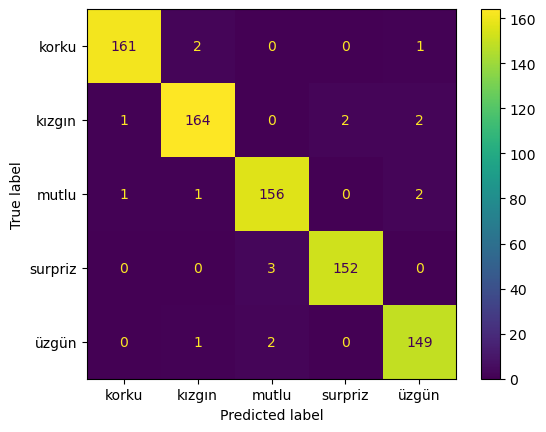

In [111]:
ConfusionMatrixDisplay(cm,display_labels=svm.classes_).plot();

In [112]:
# Modelin doğruluğunu kendimiz test edelim.

ornek=["Bugün baya güzel bir gün olacak gibi"]

y_pred=svm.predict(ornek)

y_pred

array(['mutlu'], dtype='<U7')

### SVM Algoritmasının Word2Vec ile Kullanılması

In [71]:
df["Word2Vec"]=df["Text 2"].apply(onIsleme.word2vec)

In [68]:
from gensim.models import Word2Vec

#Burda Word2Vec modelini eğittiğimiz veride bir kelimeyi bulamadığı için hata verdi. Biz de Word2Vec modelini update edip şuan kullandığımız veri kümesini
#Word2Vec modelimizin içine atıp kaydedeceğiz.
model=Word2Vec.load("Word2Vec.model")

model.build_vocab(df["Text 2"].to_list(),update=True) #yeni veri kümemizi modelin içine ekledik.

model.save("Word2Vec.model")

In [72]:
df.head()


,level_0,index,Text,Label,Text 2,Text 3,Word2Vec
0,0,0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.00031807884806767106, 0.02156771533191204,..."
1,1,1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, ne, zama, çalıştı, ür, stok, bit, diyor, ...",si ne zama çalıştı ür stok bit diyor mal mı oğ...,"[0.001837442279793322, 0.01885647140443325, 0...."
2,2,2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, ne, ki, di, bağıracak, kal]",sebep ne ki di bağıracak kal,"[-0.0038945681881159544, 0.028305575251579285,..."
3,3,3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, ne, amk, yıl, çıkar, boku, mal...",black friday ne amk yıl çıkar boku mal mı nesiniz,"[-0.0021436880342662334, 0.022532807663083076,..."
4,4,4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.0010615334613248706, 0.013570787385106087,..."


In [76]:
X_train,X_test,y_train,y_test=train_test_split(df["Word2Vec"].to_list(),df["Label"].to_list(),test_size=0.2,random_state=42)

svm=Pipeline([("SVM",LinearSVC())]).fit(X_train,y_train)

y_pred=svm.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred) #Word2Vec skorlarının daha düşük çıkması elimizdeki verilerin azlığından kaynaklıdır. Veri arttıkça Word2Vec modelinin başarısı da artacaktır.

0.41375

In [79]:
f1_score(y_test,y_pred,average="weighted")

0.41370032064245765

In [80]:
cm=confusion_matrix(y_test,y_pred)

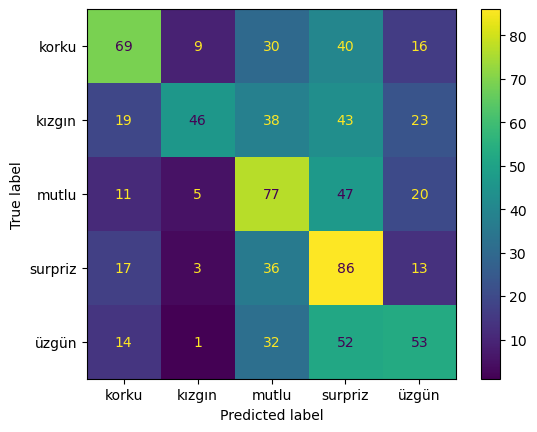

In [81]:
ConfusionMatrixDisplay(cm,display_labels=svm.classes_).plot();

### KNN Algoritması

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [84]:
df.head()

,level_0,index,Text,Label,Text 2,Text 3,Word2Vec
0,0,0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.00031807884806767106, 0.02156771533191204,..."
1,1,1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, ne, zama, çalıştı, ür, stok, bit, diyor, ...",si ne zama çalıştı ür stok bit diyor mal mı oğ...,"[0.001837442279793322, 0.01885647140443325, 0...."
2,2,2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, ne, ki, di, bağıracak, kal]",sebep ne ki di bağıracak kal,"[-0.0038945681881159544, 0.028305575251579285,..."
3,3,3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, ne, amk, yıl, çıkar, boku, mal...",black friday ne amk yıl çıkar boku mal mı nesiniz,"[-0.0021436880342662334, 0.022532807663083076,..."
4,4,4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.0010615334613248706, 0.013570787385106087,..."


In [89]:
X_train,X_test,y_train,y_test=train_test_split(df["Text 3"].to_list(),df["Label"].to_list(),test_size=0.2,random_state=42)

In [90]:
knn=Pipeline([("Vect",TfidfVectorizer()),("KNN",KNeighborsClassifier())]).fit(X_train,y_train)

y_pred=knn.predict(X_test)

c:\Users\burak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [91]:
accuracy_score(y_test,y_pred)

0.79

In [92]:
f1_score(y_test,y_pred,average="weighted")

0.7897994137650153

In [93]:
dfTest.groupby("Label").size()

Label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [94]:
cm=confusion_matrix(y_test,y_pred)

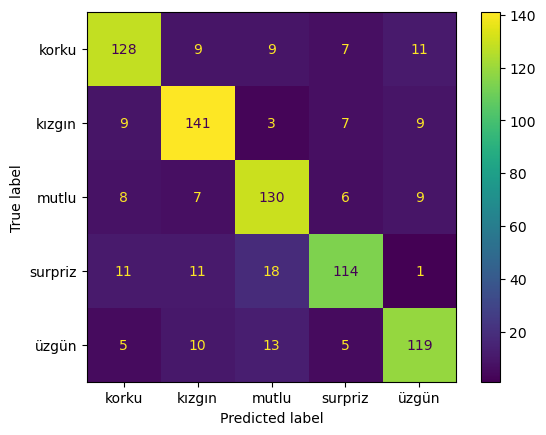

In [95]:
ConfusionMatrixDisplay(cm,display_labels=svm.classes_).plot();

In [96]:
# Modelin doğruluğunu kendimiz test edelim.

ornek=["Bugün çok güzel bir gün"]

y_pred=knn.predict(ornek)

y_pred

c:\Users\burak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['mutlu'], dtype='<U7')

### KNN Algoritmasının Word2Vec ile Kullanılması

In [98]:
X_train,X_test,y_train,y_test=train_test_split(df["Word2Vec"].to_list(),df["Label"].to_list(),test_size=0.2,random_state=42)

knn=Pipeline([("KNN",KNeighborsClassifier())]).fit(X_train,y_train)

y_pred=knn.predict(X_test)

c:\Users\burak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
accuracy_score(y_test,y_pred) #Word2Vec skorlarının daha düşük çıkması elimizdeki verilerin azlığından kaynaklıdır. Veri arttıkça Word2Vec modelinin başarısı da artacaktır.

0.34125

In [100]:
f1_score(y_test,y_pred,average="weighted")

0.33283932700714014

In [101]:
cm=confusion_matrix(y_test,y_pred)

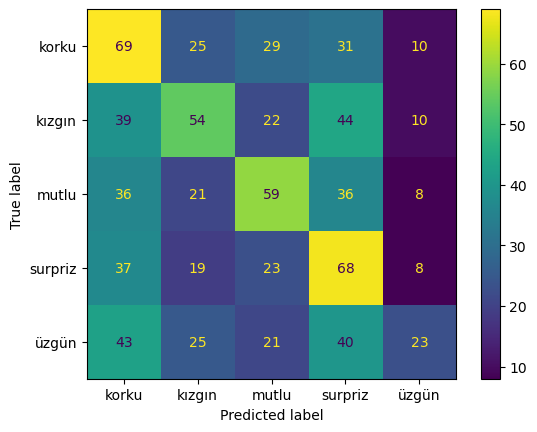

In [102]:
ConfusionMatrixDisplay(cm,display_labels=svm.classes_).plot();